# Multi-Class Land Use Classification


## Data Preparation 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import os
import tensorflow as tf
import numpy as np

# Set the seed for random operations. 
# This let our experiments to be reproducible. 
SEED = 1234
tf.random.set_seed(SEED)  

# Get current working directory
cwd = os.getcwd()

https://polimi365-my.sharepoint.com/:f:/g/personal/10393616_polimi_it/EpooajykbmBBvWyjPz4Vv38BtcFep2Fk6wHvDEeQTHJukw?e=fyafEp

https://polimi365-my.sharepoint.com/:u:/g/personal/10104160_polimi_it/EWA1ekjfRepPt5P9cpqjdycBbFFUOtlcLG8yyasZ8sFVjA?e=8cabgP

### Directory structure

    - UCMerced_LandUse/
        - training/
            - agricultural/
                - img1, img2, …, imgN
            - …
            - parkinglot/ 
                - img1, img2, ... , imgN
        - validation/
            - agricultural/
                - img1, img2, …, imgN
            - …
            - parkinglot/ 
                - img1, img2, ... , imgN
        - test/
            - agricultural/
                - img1, img2, …, imgN
            - …
            - parkinglot/ 
                - img1, img2, ... , imgN

The dataset is organized into three sets: training, validation, and test. We use the `ImageDataGenerator` class from TensorFlow to load and augment the data. The images are resized to 256x256 pixels and normalized to values between 0 and 1. Data augmentation techniques such as rotation, shifting, zooming, and flipping are applied to the training data to increase its variability.

In [3]:
# ImageDataGenerator
# ------------------

from tensorflow.keras.preprocessing.image import ImageDataGenerator

apply_data_augmentation = True

# Create training ImageDataGenerator object
if apply_data_augmentation:
    train_data_gen = ImageDataGenerator(rotation_range=10,
                                        width_shift_range=10,
                                        height_shift_range=10,
                                        zoom_range=0.3,
                                        horizontal_flip=True,
                                        vertical_flip=True,
                                        fill_mode='constant',
                                        cval=0,
                                        rescale=1./255)
else:
    train_data_gen = ImageDataGenerator(rescale=1./255)

# Create validation and test ImageDataGenerator objects
valid_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

In [4]:
# Create generators to read images from dataset directory
# -------------------------------------------------------
dataset_dir = os.path.join(cwd, 'UCMerced_LandUse')

# img

# Batch size
bs = 8

# img shape
img_h = 256
img_w = 256

num_classes=21

# Training
training_dir = os.path.join(dataset_dir, 'training')
train_gen = train_data_gen.flow_from_directory(training_dir,
                                               batch_size=bs, 
                                               class_mode='categorical',
                                               shuffle=True,
                                               seed=SEED)  # targets are directly converted into one-hot vectors

# Validation
validation_dir = os.path.join(dataset_dir, 'validation')
valid_gen = valid_data_gen.flow_from_directory(validation_dir,
                                               batch_size=bs, 
                                               class_mode='categorical',
                                               shuffle=False,
                                               seed=SEED)

# Test
test_dir = os.path.join(dataset_dir, 'test')
test_gen = test_data_gen.flow_from_directory(test_dir,
                                             batch_size=bs, 
                                             class_mode='categorical',
                                             shuffle=False,
                                             seed=SEED)

Found 1470 images belonging to 21 classes.
Found 315 images belonging to 21 classes.
Found 315 images belonging to 21 classes.


In [5]:
# Create Dataset objects
# ----------------------

# Training
train_dataset = tf.data.Dataset.from_generator(lambda: train_gen,
                                               output_types=(tf.float32, tf.float32),
                                               output_shapes=([None, img_h, img_w, 3], [None, num_classes]))

# Shuffle (Already done in generator..)
# train_dataset = train_dataset.shuffle(buffer_size=len(train_gen))

# Normalize images (Already done in generator..)
# def normalize_img(x_, y_):
#     return tf.cast(x_, tf.float32) / 255., y_

# train_dataset = train_dataset.map(normalize_img)

# 1-hot encoding <- for categorical cross entropy (Already done in generator..)
# def to_categorical(x_, y_):
#     return x_, tf.one_hot(y_, depth=10)

# train_dataset = train_dataset.map(to_categorical)

# Divide in batches (Already done in generator..)
# train_dataset = train_dataset.batch(bs)

# Repeat
# Without calling the repeat function the dataset 
# will be empty after consuming all the images
train_dataset = train_dataset.repeat()

# Validation
# ----------
valid_dataset = tf.data.Dataset.from_generator(lambda: valid_gen, 
                                               output_types=(tf.float32, tf.float32),
                                               output_shapes=([None, img_h, img_w, 3], [None, num_classes]))

# Repeat
valid_dataset = valid_dataset.repeat()

# Test
# ----
test_dataset = tf.data.Dataset.from_generator(lambda: test_gen,
                                              output_types=(tf.float32, tf.float32),
                                              output_shapes=([None, img_h, img_w, 3], [None, num_classes]))

# Repeat
test_dataset = test_dataset.repeat()

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-06-10 18:45:23.755688: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-10 18:45:23.755729: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
# Print dataset information
print("Dataset Information:")
print("Number of classes:", num_classes)

print("\nTraining Dataset:")
print("Number of samples:", train_gen.samples)
print("Number of batches:", len(train_gen))
print("Batch size:", bs)
print("Input shape:", train_gen.image_shape)


print("\nValidation Dataset:")
print("Number of samples:", valid_gen.samples)
print("Number of batches:", len(valid_gen))
print("Batch size:", bs)
print("Input shape:", valid_gen.image_shape)


print("\nTest Dataset:")
print("Number of samples:", test_gen.samples)
print("Number of batches:", len(test_gen))
print("Batch size:", bs)
print("Input shape:", test_gen.image_shape)


Dataset Information:
Number of classes: 21

Training Dataset:
Number of samples: 1470
Number of batches: 184
Batch size: 8
Input shape: (256, 256, 3)

Validation Dataset:
Number of samples: 315
Number of batches: 40
Batch size: 8
Input shape: (256, 256, 3)

Test Dataset:
Number of samples: 315
Number of batches: 40
Batch size: 8
Input shape: (256, 256, 3)


## Model CNN 

The CNN model architecture consists of several convolutional and max pooling layers, followed by fully connected layers. ReLU activation is used after each convolutional layer, and dropout regularization is applied to reduce overfitting. The final layer uses softmax activation for multi-class classification.

The model is compiled with the Adam optimizer and categorical cross-entropy loss. It is trained on the training dataset with early stopping based on validation loss. The training and validation accuracies are monitored and plotted over epochs.

After training, the model is evaluated on the test dataset, and the test accuracy and loss are calculated. The classification report and confusion matrix are generated to assess the model's performance on individual classes.

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_cnn = tf.keras.Sequential()

model_cnn.add(tf.keras.layers.Conv2D(input_shape=(256, 256, 3),
                                     filters=16,
                                     kernel_size=(3, 3),        
                                     strides=(1, 1), 
                                     padding='same'))
model_cnn.add(tf.keras.layers.ReLU())
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model_cnn.add(tf.keras.layers.Conv2D(filters=32,
                                     kernel_size=(3, 3),
                                     strides=(1, 1), 
                                     padding='same'))
model_cnn.add(tf.keras.layers.ReLU())
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model_cnn.add(tf.keras.layers.Conv2D(filters=64,
                                     kernel_size=(3, 3),
                                     strides=(1, 1), 
                                     padding='same'))
model_cnn.add(tf.keras.layers.ReLU())
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model_cnn.add(tf.keras.layers.Conv2D(filters=128,
                                     kernel_size=(3, 3),
                                     strides=(1, 1), 
                                     padding='same'))
model_cnn.add(tf.keras.layers.ReLU())
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model_cnn.add(tf.keras.layers.Conv2D(filters=256,
                                     kernel_size=(3, 3),
                                     strides=(1, 1),
                                     padding='same'))
model_cnn.add(tf.keras.layers.ReLU())
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(units=512, activation=tf.keras.activations.relu))
model_cnn.add(tf.keras.layers.Dropout(0.5))
model_cnn.add(tf.keras.layers.Dense(units=256, activation=tf.keras.activations.relu))
model_cnn.add(tf.keras.layers.Dense(units=21, activation=tf.keras.activations.softmax))

# Compile the model
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_cnn.summary()

# Define the model checkpoint callback
checkpoint = ModelCheckpoint('model_cnn_best.h5', monitor='val_loss', save_best_only=True)

# Calculate the number of steps per epoch
steps_per_epoch = 1470 // 8  # Replace with the actual number of training samples and batch size
validation_steps = 315 // 8  # Replace with the actual number of validation samples and batch size

history = model_cnn.fit(x=train_dataset,
                        epochs=100,
                        steps_per_epoch=steps_per_epoch,
                        validation_data=valid_dataset,
                        validation_steps=validation_steps,
                        callbacks=[checkpoint])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 re_lu (ReLU)                (None, 256, 256, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 re_lu_1 (ReLU)              (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                   

2023-06-10 18:18:39.599475: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-06-10 18:18:39.858376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


183/183 [==============================] - ETA: 0s - loss: 3.0474 - accuracy: 0.0444

2023-06-10 18:18:49.212270: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-06-10 18:18:49.264755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


183/183 [==============================] - 10s 53ms/step - loss: 3.0474 - accuracy: 0.0444 - val_loss: 3.0040 - val_accuracy: 0.0865
Epoch 2/100


/Users/riccardopandolfi/tensorflow-test/env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


183/183 [==============================] - 11s 58ms/step - loss: 2.8428 - accuracy: 0.0971 - val_loss: 2.6080 - val_accuracy: 0.1186
Epoch 3/100
183/183 [==============================] - 10s 55ms/step - loss: 2.5339 - accuracy: 0.1457 - val_loss: 2.3833 - val_accuracy: 0.1955
Epoch 4/100
183/183 [==============================] - 9s 51ms/step - loss: 2.3277 - accuracy: 0.1997 - val_loss: 2.1850 - val_accuracy: 0.2313
Epoch 5/100
183/183 [==============================] - 9s 51ms/step - loss: 2.1851 - accuracy: 0.2538 - val_loss: 1.9732 - val_accuracy: 0.3355
Epoch 6/100
183/183 [==============================] - 10s 54ms/step - loss: 1.9964 - accuracy: 0.3276 - val_loss: 1.7640 - val_accuracy: 0.3909
Epoch 7/100
183/183 [==============================] - 10s 53ms/step - loss: 1.8050 - accuracy: 0.3871 - val_loss: 1.6087 - val_accuracy: 0.4528
Epoch 8/100
183/183 [==============================] - 11s 58ms/step - loss: 1.7545 - accuracy: 0.4036 - val_loss: 1.8485 - val_accuracy: 0.3322

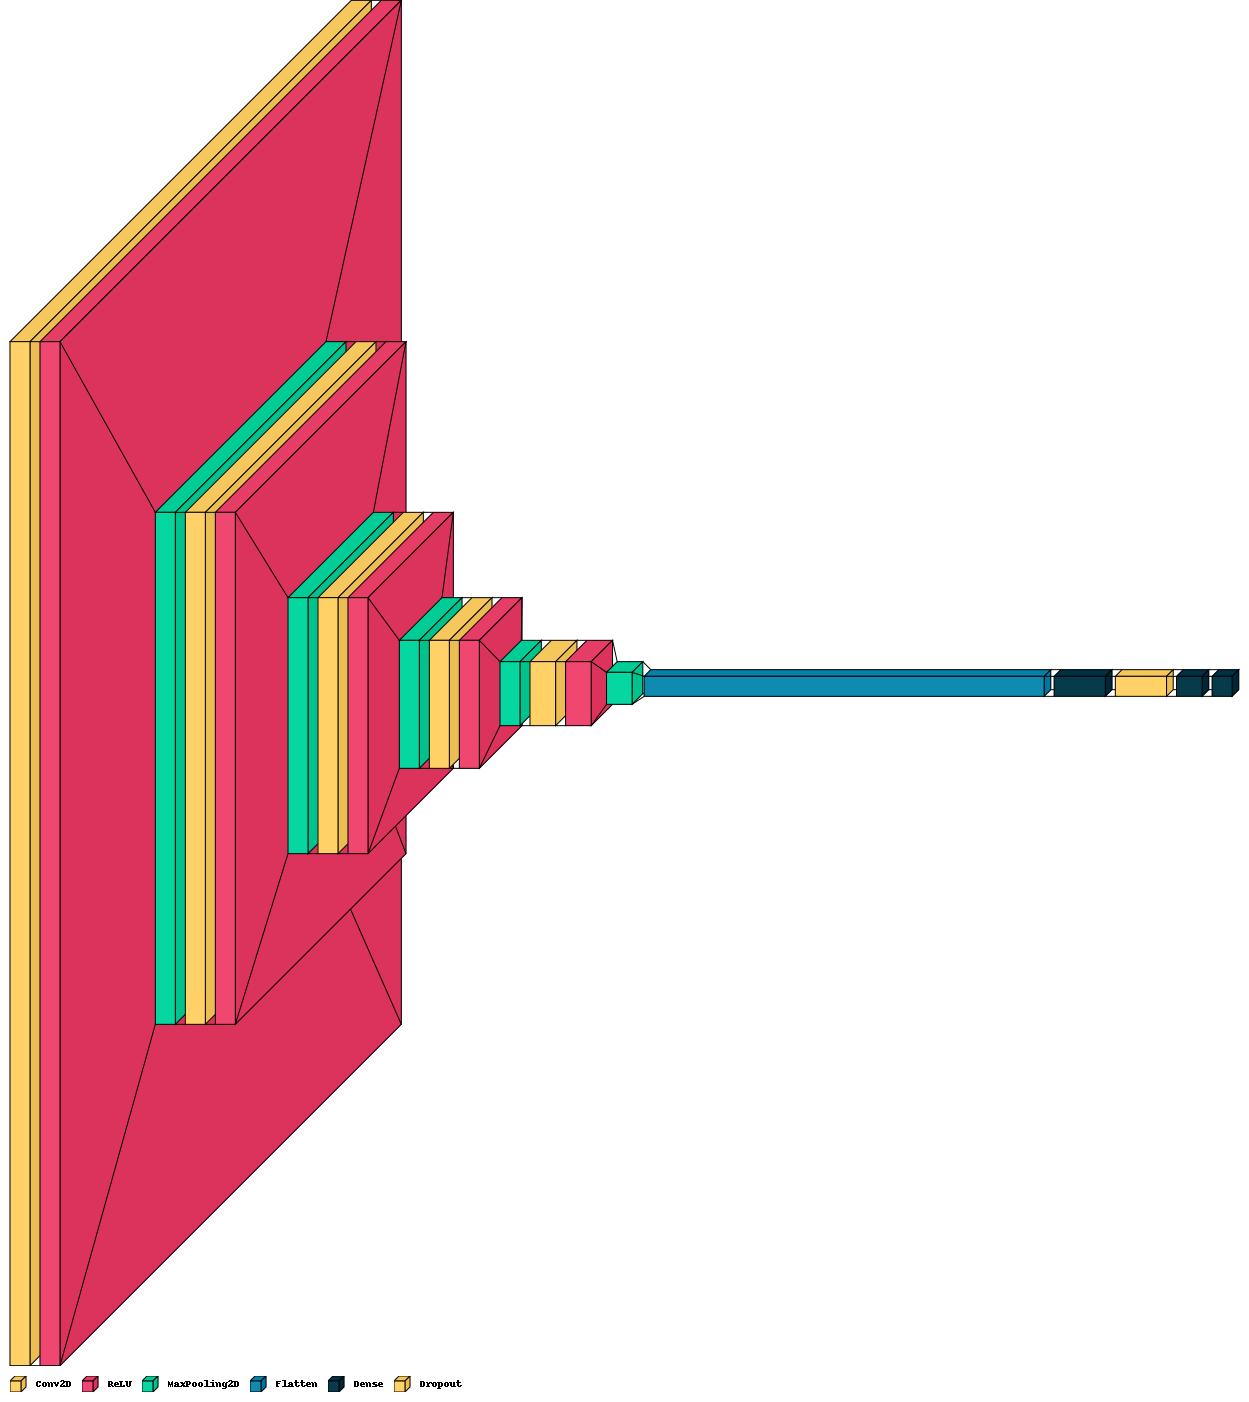

In [8]:
import visualkeras
from IPython.display import Image, display

visualkeras.layered_view(model_cnn, legend=True).save('model_cnn.png')  

display(Image(filename='model_cnn.png'))

In [9]:
# Retrieve the corresponding metrics
best_epoch = np.argmin(history.history['val_loss']) + 1
best_val_loss = np.min(history.history['val_loss'])
best_val_accuracy = history.history['val_accuracy'][best_epoch - 1]
best_train_loss = history.history['loss'][best_epoch - 1]
best_train_accuracy = history.history['accuracy'][best_epoch - 1]

print('Best Epoch:', best_epoch)
print('Best Validation Loss:', best_val_loss)
print('Best Validation Accuracy:', best_val_accuracy)
print('Corresponding Training Loss:', best_train_loss)
print('Corresponding Training Accuracy:', best_train_accuracy)

Best Epoch: 98
Best Validation Loss: 0.47540974617004395
Best Validation Accuracy: 0.8631922006607056
Corresponding Training Loss: 0.325382262468338
Corresponding Training Accuracy: 0.8905609250068665


In [10]:
test_steps = 40  # Number of batches in the test dataset
test_loss, test_accuracy = model_cnn.evaluate(test_dataset, steps=test_steps)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)



 9/40 [=====>........................] - ETA: 0s - loss: 0.6401 - accuracy: 0.8194

2023-06-10 18:43:23.834420: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


40/40 [==============================] - 1s 18ms/step - loss: 0.6366 - accuracy: 0.8254
Test Loss: 0.6366069316864014
Test Accuracy: 0.8253968358039856


Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Training and Validation Loss')

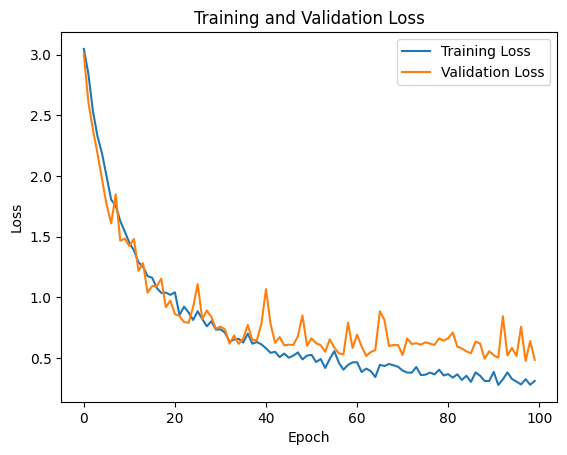

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Training and Validation Accuracy')

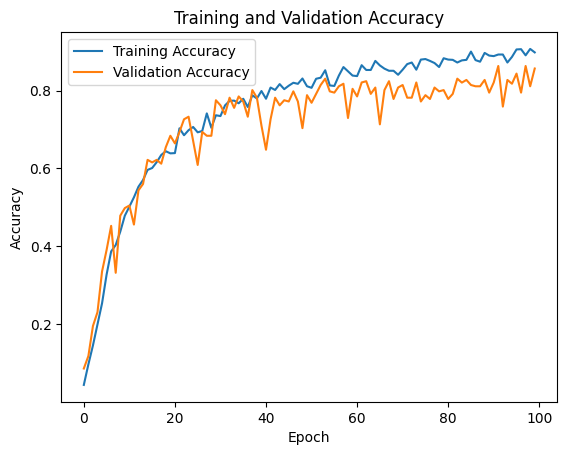

In [11]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


1/1 [==============================] - 0s 219ms/step


2023-06-10 18:43:26.699657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 14ms/step


<Figure size 1000x1000 with 0 Axes>

<Axes: >

Text(0.5, 80.7222222222222, 'Predicted')

Text(95.72222222222221, 0.5, 'True')

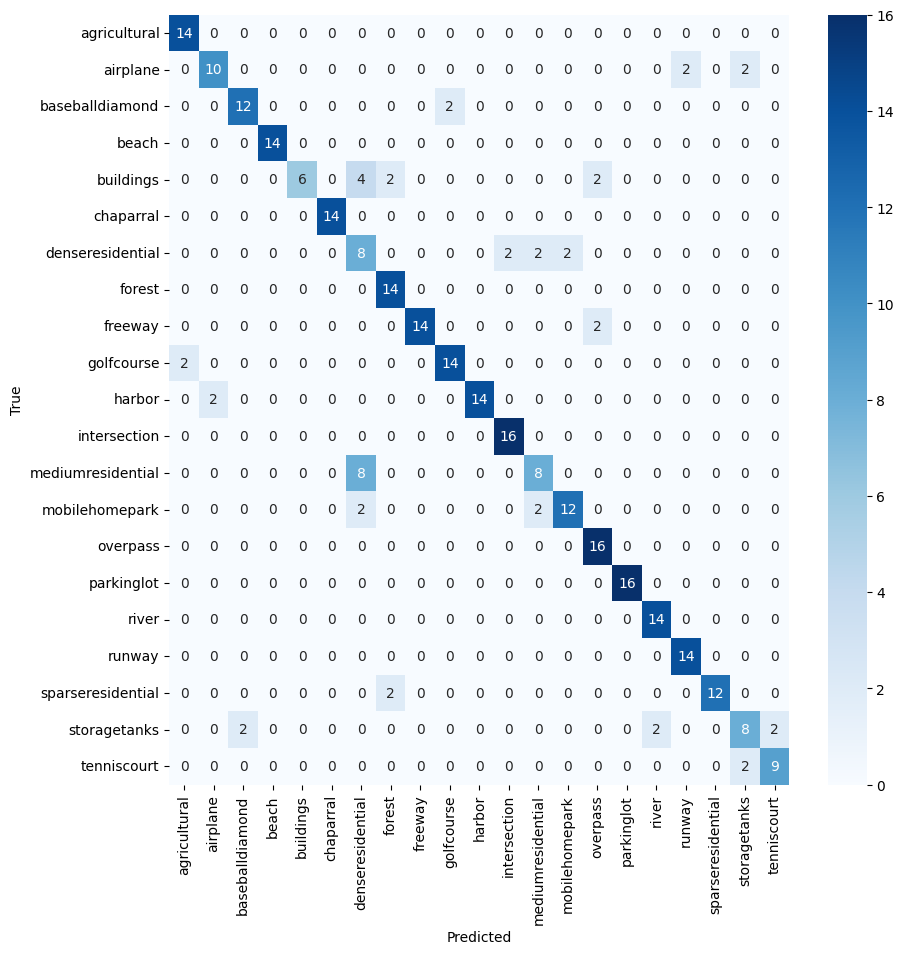

                   precision    recall  f1-score   support

     agricultural       0.88      1.00      0.93        14
         airplane       0.83      0.71      0.77        14
  baseballdiamond       0.86      0.86      0.86        14
            beach       1.00      1.00      1.00        14
        buildings       1.00      0.43      0.60        14
        chaparral       1.00      1.00      1.00        14
 denseresidential       0.36      0.57      0.44        14
           forest       0.78      1.00      0.88        14
          freeway       1.00      0.88      0.93        16
       golfcourse       0.88      0.88      0.88        16
           harbor       1.00      0.88      0.93        16
     intersection       0.89      1.00      0.94        16
mediumresidential       0.67      0.50      0.57        16
   mobilehomepark       0.86      0.75      0.80        16
         overpass       0.80      1.00      0.89        16
       parkinglot       1.00      1.00      1.00       

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize lists to store the true and predicted classes
true_classes = []
predicted_classes = []

# Specify the number of steps to iterate over the test dataset
steps = 315 // 8  # Adjust this according to your test dataset size and batch size

# Iterate over the specified number of steps in the test dataset
for _ in range(steps):
    images, labels = next(iter(test_dataset))

    # Predict the classes of the images in the current batch
    predictions = model_cnn.predict(images)
    predicted_classes_batch = np.argmax(predictions, axis=1)

    # Get the true classes of the images in the current batch
    true_classes_batch = np.argmax(labels.numpy(), axis=1)

    # Add the true and predicted classes of the current batch to the lists
    true_classes.extend(true_classes_batch)
    predicted_classes.extend(predicted_classes_batch)

# Calculate the confusion matrix
matrix = confusion_matrix(true_classes, predicted_classes)

# Define your class names
class_names = ['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings',
               'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse', 
               'harbor', 'intersection', 'mediumresidential', 'mobilehomepark',
               'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential', 
               'storagetanks', 'tenniscourt']

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=class_names, yticklabels=class_names)  # Set the tick labels to your class names
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate classification report
report = classification_report(true_classes, predicted_classes, target_names=class_names)
print(report)

In [9]:
#Load model
model_cnn = tf.keras.models.load_model('model_cnn_best.h5')

#Create a list of class names
class_names = ['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings',
               'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse', 
               'harbor', 'intersection', 'mediumresidential', 'mobilehomepark',
               'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential', 
               'storagetanks', 'tenniscourt']

1/1 [==============================] - 0s 14ms/step


(-0.5, 255.5, 255.5, -0.5)

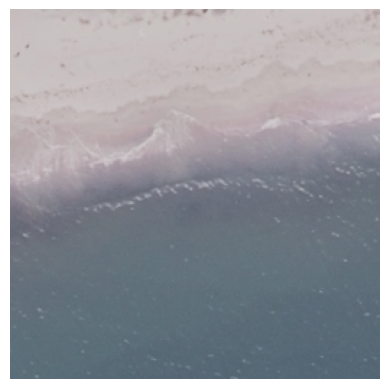

True Label: beach
Predicted Label: beach



(-0.5, 255.5, 255.5, -0.5)

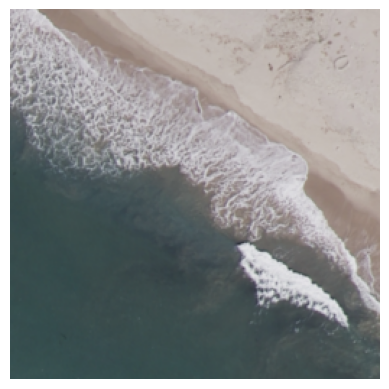

True Label: beach
Predicted Label: beach



(-0.5, 255.5, 255.5, -0.5)

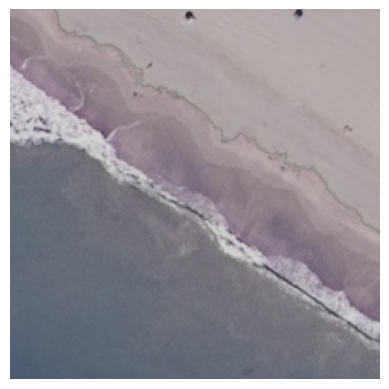

True Label: beach
Predicted Label: beach



(-0.5, 255.5, 255.5, -0.5)

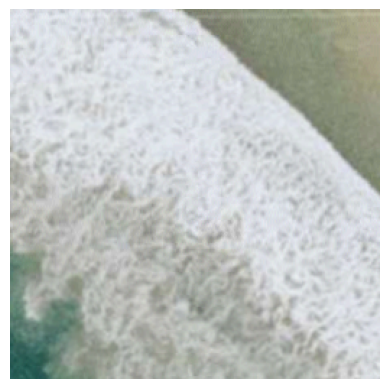

True Label: beach
Predicted Label: runway



(-0.5, 255.5, 255.5, -0.5)

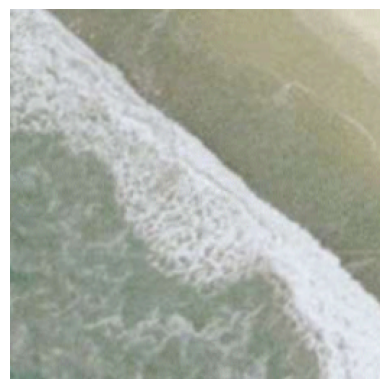

True Label: beach
Predicted Label: beach



In [12]:
import random
import matplotlib.pyplot as plt

# Retrieve a batch of images and labels from the test dataset
images, labels = next(iter(test_dataset))

# Predict the classes of the images in the batch
predictions = model_cnn.predict(images)
predicted_classes_batch = np.argmax(predictions, axis=1)

# Convert predicted class indices to class labels
predicted_labels_batch = [class_names[i] for i in predicted_classes_batch]

# Select a few random images from the batch
num_images = 5
random_indices = random.sample(range(len(images)), num_images)

# Display the selected images along with their true and predicted labels
for idx in random_indices:
    image = images[idx]
    true_label = class_names[np.argmax(labels.numpy()[idx])]
    predicted_label = predicted_labels_batch[idx]
    
    # Display the image
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    # Print the true and predicted labels
    print('True Label:', true_label)
    print('Predicted Label:', predicted_label)
    print()


We have obtained a model with train, validation and test accuracy all above 80% which is quite a good result considering the lower bound for classification tasks.
We can also see that the model is not overfitting so much since the validation accuracy is quite the same as the training accuracy and the test accuracy is a little bit lower.
Probably making the model more complex would improve the results, but we have to consider that the training time would increase as well.

## Transfer Learning

In addition to the CNN model, we also explore transfer learning using the MobileNet architecture pre-trained on ImageNet. We load the MobileNet base model without the top layers and add new layers for our specific classification task. The base model is frozen, and only the new layers are trained. The model is compiled and trained on the dataset, and its performance is evaluated.

The training and validation accuracies, losses, and evaluation metrics such as test accuracy are displayed. 

Additionally, plots for training and validation accuracy/loss curves are generated to visualize the model's learning progress over epochs.

In [14]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

# Load the MobileNet model, pretrained on ImageNet, without the top layers
base_model = MobileNet(weights="imagenet", include_top=False, input_shape=(256, 256, 3))  # Adjusted input shape

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Add new layers
head_model = base_model.output
head_model = AveragePooling2D(pool_size=(7, 7))(head_model)
head_model = Flatten(name="flatten")(head_model)
head_model = Dense(128, activation="relu")(head_model)
head_model = Dropout(0.5)(head_model)
head_model = Dense(21, activation="softmax")(head_model)  # 21 classes

# Combine base model with new layers
model = Model(inputs=base_model.input, outputs=head_model)

# Compile the model
opt = Adam(lr=1e-3)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

# Setup callbacks
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
logs = TensorBoard("logs")

# Train the model
epochs = 30
batch_size = 10

history = model.fit(
    train_dataset,
    epochs=epochs,
    steps_per_epoch=184,  # Number of batches in training set
    verbose=1,
    validation_data=valid_dataset,
    validation_steps=40,  # Number of batches in validation set
    callbacks=[checkpoint, logs]
)



Epoch 1/30


2023-06-10 18:50:38.165440: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


184/184 [==============================] - ETA: 0s - loss: 1.6508 - accuracy: 0.5320

2023-06-10 18:50:48.349320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.84762, saving model to model_weights.h5
184/184 [==============================] - 12s 63ms/step - loss: 1.6508 - accuracy: 0.5320 - val_loss: 0.5095 - val_accuracy: 0.8476
Epoch 2/30
184/184 [==============================] - ETA: 0s - loss: 0.5369 - accuracy: 0.8293
Epoch 2: val_accuracy improved from 0.84762 to 0.89206, saving model to model_weights.h5
184/184 [==============================] - 12s 65ms/step - loss: 0.5369 - accuracy: 0.8293 - val_loss: 0.3369 - val_accuracy: 0.8921
Epoch 3/30
184/184 [==============================] - ETA: 0s - loss: 0.3564 - accuracy: 0.8871
Epoch 3: val_accuracy improved from 0.89206 to 0.93016, saving model to model_weights.h5
184/184 [==============================] - 12s 64ms/step - loss: 0.3564 - accuracy: 0.8871 - val_loss: 0.2390 - val_accuracy: 0.9302
Epoch 4/30
184/184 [==============================] - ETA: 0s - loss: 0.3038 - accuracy: 0.9068
Epoch 4: val_accuracy did not improve from 0.930

In [15]:
# Retrieve the corresponding metrics
best_epoch = np.argmin(history.history['val_loss']) + 1
best_val_loss = np.min(history.history['val_loss'])
best_val_accuracy = history.history['val_accuracy'][best_epoch - 1]
best_train_loss = history.history['loss'][best_epoch - 1]
best_train_accuracy = history.history['accuracy'][best_epoch - 1]

print('Best Epoch:', best_epoch)
print('Best Validation Loss:', best_val_loss)
print('Best Validation Accuracy:', best_val_accuracy)
print('Corresponding Training Loss:', best_train_loss)
print('Corresponding Training Accuracy:', best_train_accuracy)

Best Epoch: 27
Best Validation Loss: 0.09155437350273132
Best Validation Accuracy: 0.9682539701461792
Corresponding Training Loss: 0.08042386174201965
Corresponding Training Accuracy: 0.9693877696990967


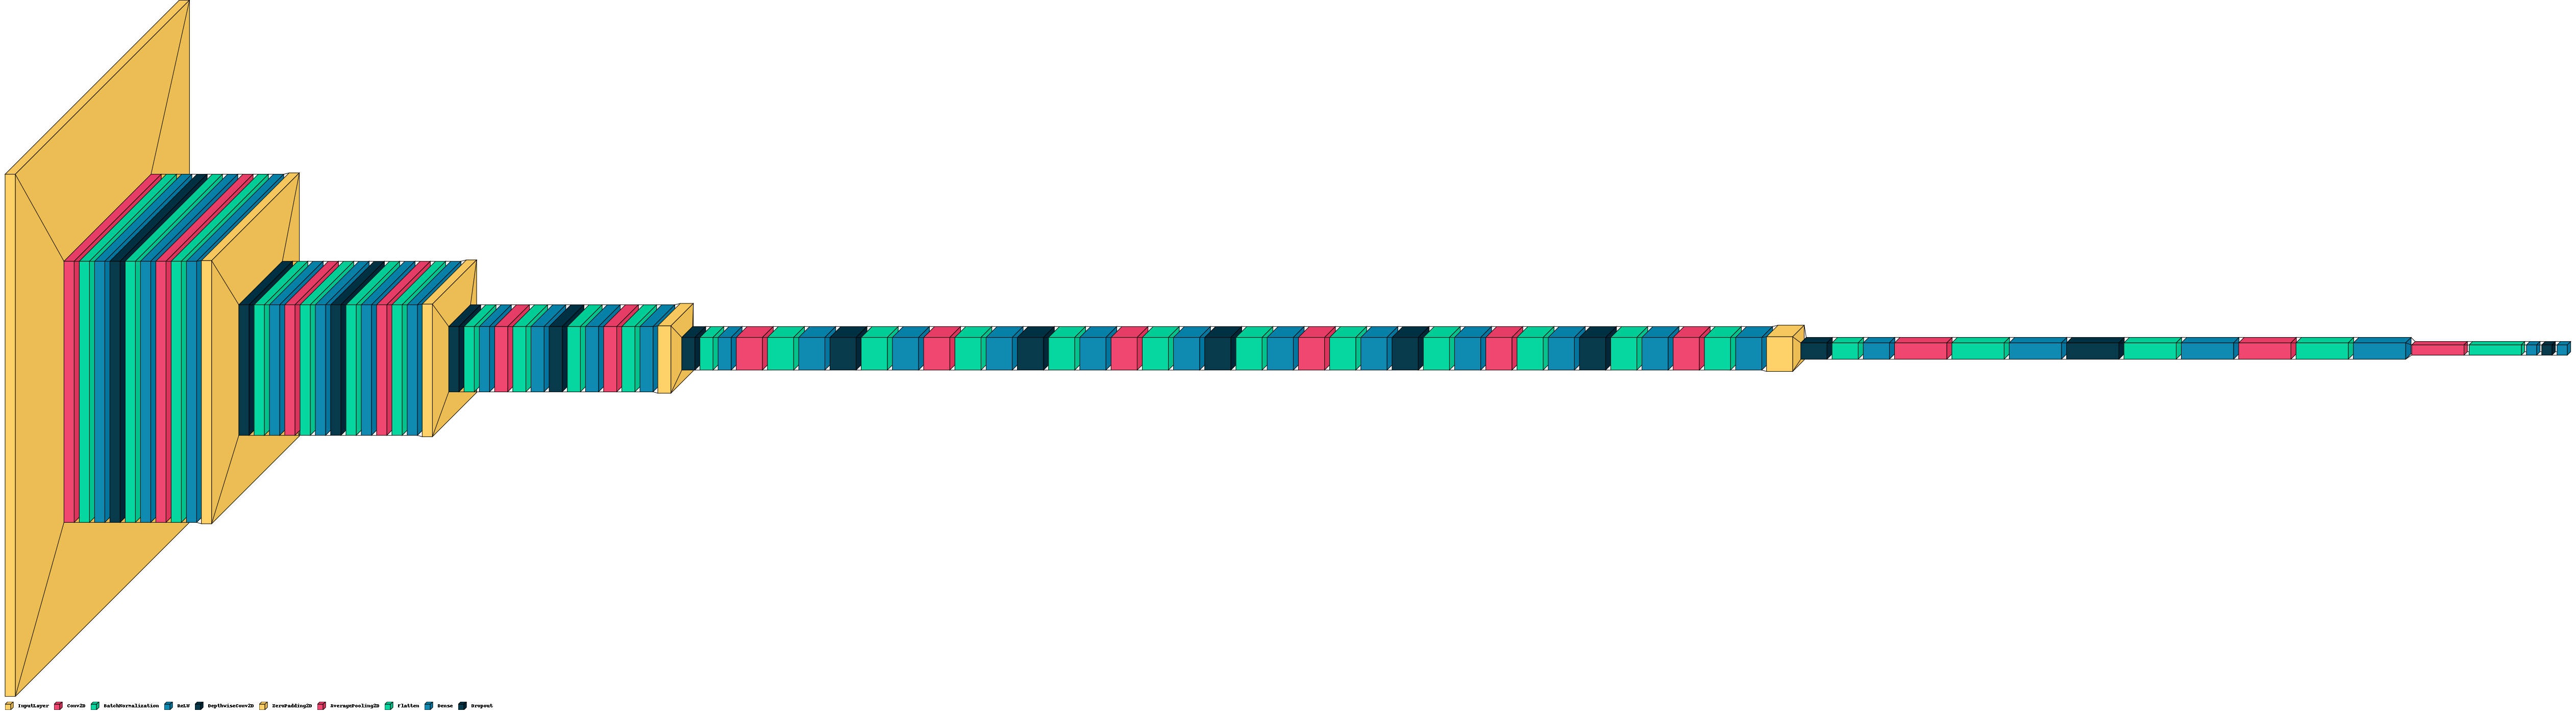

In [23]:
import visualkeras
from IPython.display import Image, display

# Generate the visual representation of the model
visualkeras.layered_view(model, legend=True, ).save('model.png')  

# Display the image
display(Image(filename='model.png'))

In [17]:
test_dataset = test_dataset.take(315)  # Limit the number of samples

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)

# Print the test accuracy and loss
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

  3/315 [..............................] - ETA: 9s - loss: 0.8179 - accuracy: 0.7917 

2023-06-10 18:57:23.280570: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


315/315 [==============================] - 12s 38ms/step - loss: 0.1490 - accuracy: 0.9589
Test Accuracy: 0.9588709473609924
Test Loss: 0.14898620545864105


Text(0.5, 1.0, 'Model Accuracy')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

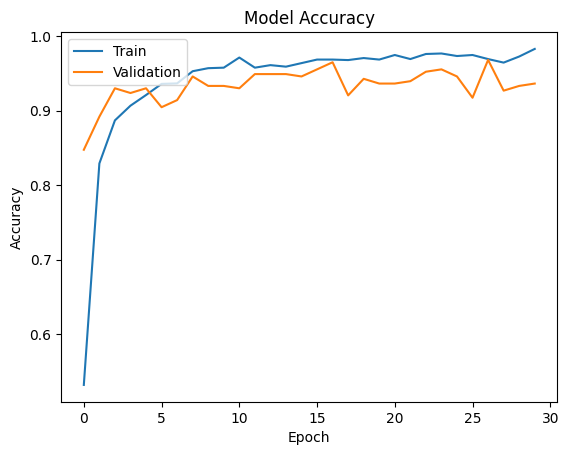

Text(0.5, 1.0, 'Model Loss')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Loss')

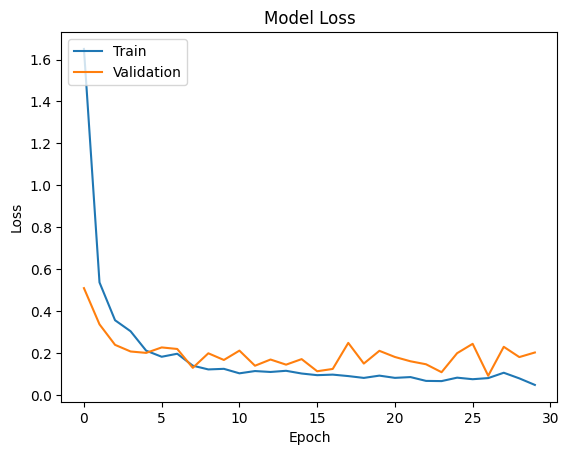

In [18]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [19]:
# Test
test_dir = os.path.join(dataset_dir, 'test')
test_gen = test_data_gen.flow_from_directory(test_dir,
                                             batch_size=bs, 
                                             class_mode='categorical',
                                             shuffle=False,
                                             seed=SEED)

# Test
# ----
test_dataset = tf.data.Dataset.from_generator(lambda: test_gen,
                                              output_types=(tf.float32, tf.float32),
                                              output_shapes=([None, img_h, img_w, 3], [None, num_classes]))

# Do NOT repeat the test dataset
# test_dataset = test_dataset.repeat()


Found 315 images belonging to 21 classes.


2023-06-10 18:57:36.451039: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-06-10 18:57:36.717558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 23ms/step


<Figure size 1000x1000 with 0 Axes>

<Axes: >

Text(0.5, 80.7222222222222, 'Predicted')

Text(95.72222222222221, 0.5, 'True')

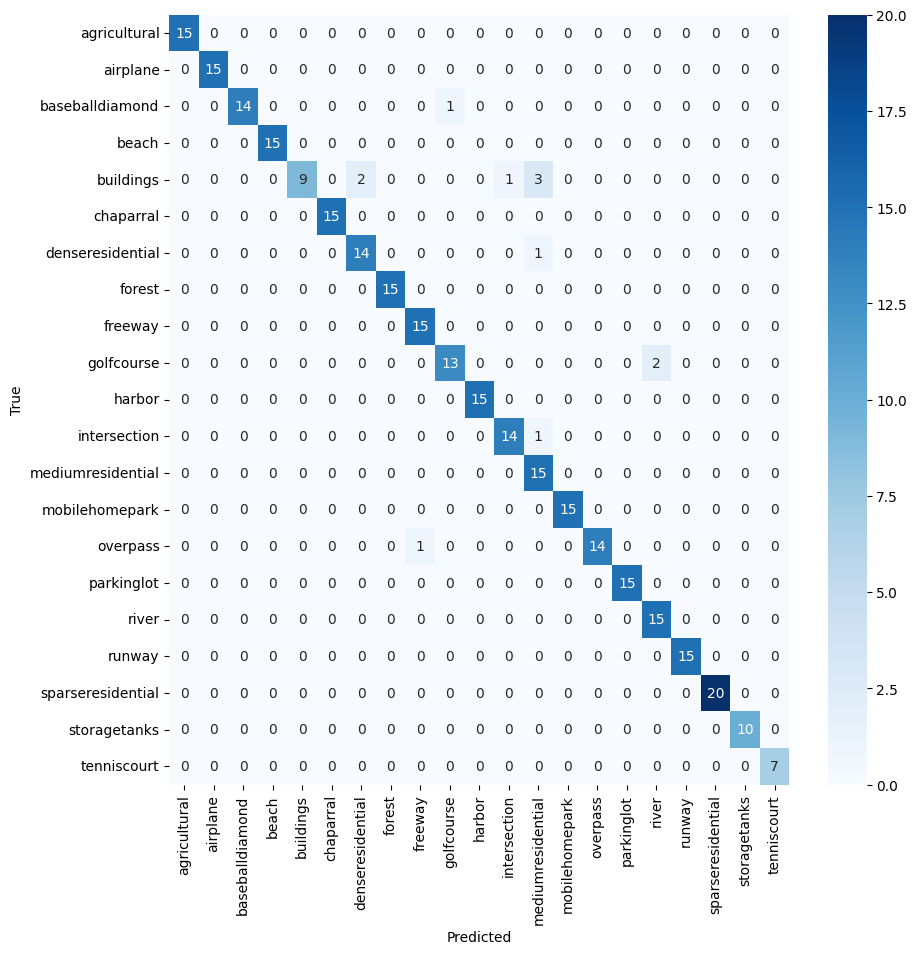

                   precision    recall  f1-score   support

     agricultural       1.00      1.00      1.00        15
         airplane       1.00      1.00      1.00        15
  baseballdiamond       1.00      0.93      0.97        15
            beach       1.00      1.00      1.00        15
        buildings       1.00      0.60      0.75        15
        chaparral       1.00      1.00      1.00        15
 denseresidential       0.88      0.93      0.90        15
           forest       1.00      1.00      1.00        15
          freeway       0.94      1.00      0.97        15
       golfcourse       0.93      0.87      0.90        15
           harbor       1.00      1.00      1.00        15
     intersection       0.93      0.93      0.93        15
mediumresidential       0.75      1.00      0.86        15
   mobilehomepark       1.00      1.00      1.00        15
         overpass       1.00      0.93      0.97        15
       parkinglot       1.00      1.00      1.00       

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize lists to store the true and predicted classes
true_classes = []
predicted_classes = []

# Specify the number of steps to iterate over the test dataset
steps = 315 // 8  # Adjust this according to your test dataset size and batch size

# Iterate over the specified number of steps in the test dataset
for _ in range(steps):
    images, labels = next(iter(test_dataset))

    # Predict the classes of the images in the current batch
    predictions = model.predict(images)
    predicted_classes_batch = np.argmax(predictions, axis=1)

    # Get the true classes of the images in the current batch
    true_classes_batch = np.argmax(labels.numpy(), axis=1)

    # Add the true and predicted classes of the current batch to the lists
    true_classes.extend(true_classes_batch)
    predicted_classes.extend(predicted_classes_batch)

# Calculate the confusion matrix
matrix = confusion_matrix(true_classes, predicted_classes)

# Define your class names
class_names = ['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings',
               'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse', 
               'harbor', 'intersection', 'mediumresidential', 'mobilehomepark',
               'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential', 
               'storagetanks', 'tenniscourt']

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=class_names, yticklabels=class_names)  # Set the tick labels to your class names
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate classification report
report = classification_report(true_classes, predicted_classes, target_names=class_names)
print(report)


1/1 [==============================] - 0s 42ms/step


(-0.5, 255.5, 255.5, -0.5)

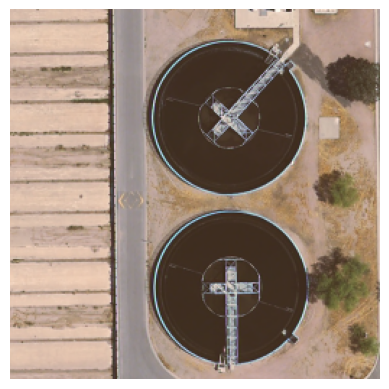

True Label: storagetanks
Predicted Label: storagetanks



(-0.5, 255.5, 255.5, -0.5)

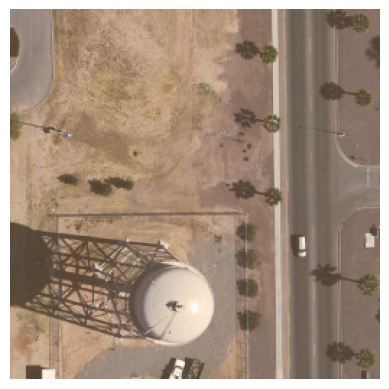

True Label: storagetanks
Predicted Label: storagetanks



(-0.5, 255.5, 255.5, -0.5)

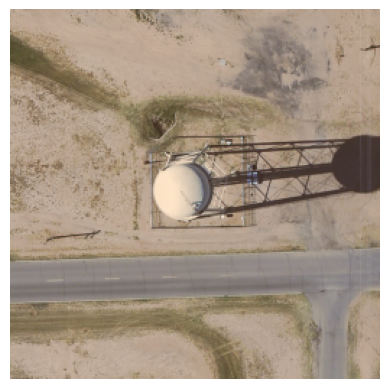

True Label: storagetanks
Predicted Label: storagetanks



(-0.5, 255.5, 255.5, -0.5)

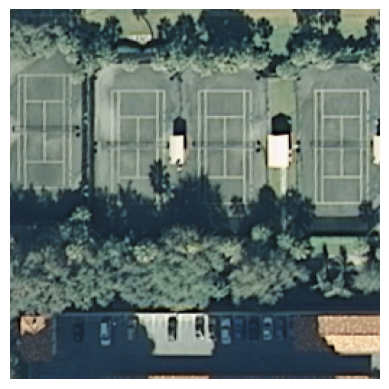

True Label: tenniscourt
Predicted Label: tenniscourt



(-0.5, 255.5, 255.5, -0.5)

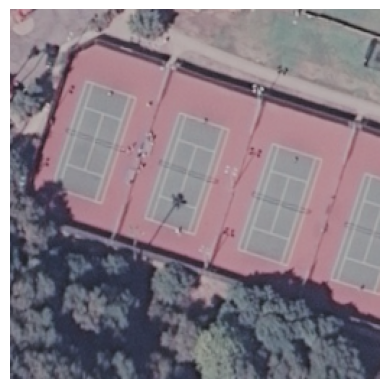

True Label: tenniscourt
Predicted Label: tenniscourt



In [21]:
import random

# Retrieve a batch of images and labels from the test dataset
images, labels = next(iter(test_dataset))

# Predict the classes of the images in the batch
predictions = model.predict(images)
predicted_classes_batch = np.argmax(predictions, axis=1)

# Convert predicted class indices to class labels
predicted_labels_batch = [class_names[i] for i in predicted_classes_batch]

# Select a few random images from the batch
num_images = 5
random_indices = random.sample(range(len(images)), num_images)

# Display the selected images along with their true and predicted labels
for idx in random_indices:
    image = images[idx]
    true_label = class_names[np.argmax(labels.numpy()[idx])]
    predicted_label = predicted_labels_batch[idx]
    
    # Display the image
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    # Print the true and predicted labels
    print('True Label:', true_label)
    print('Predicted Label:', predicted_label)
    print()
